# Radiation

* Te: Temperature of Enclosure
* Td: Initial Temperature of Disk
* T2: Temperature of disk


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import display


In [2]:
T_e = 335.3 # K
T_d = 307 # K

df_rad = pd.read_csv('data/radiation.csv', index_col=0)
df_rad.head()


,t,T
No,,
1,0,33.8
2,5,33.8
3,10,34.1
4,15,34.4
5,20,34.4


slope: [0.01887247], intercept: 307.1618226600985


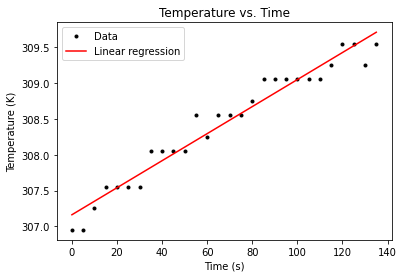

In [3]:
X = df_rad['t'].values
y = df_rad['T'].values + 273.15
reg = LinearRegression().fit(X.reshape(-1, 1), y)
m = reg.coef_
c = reg.intercept_

y_pred = m*X + c

plt.plot(X, y, '.k', label='Data')
plt.plot(X, y_pred, '-r', label='Linear regression')
plt.title('Temperature vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.legend()
print(f"slope: {reg.coef_}, intercept: {reg.intercept_}")


# Conduction

S = steel  
B = brass  

V = voltage (V)  
I = current (A)  
t = thickness (m)  


## Steel (Dataset 1)

,T1,T2,T3,T6,T7,T8
t,,,,,,
0,36.6,36.3,36.1,34.5,33.8,33.2
3,47.0,45.6,44.3,30.3,30.0,29.9
6,51.6,50.0,48.6,31.5,30.5,30.2
9,55.0,53.4,51.8,32.1,30.9,30.5
12,57.4,55.8,54.1,32.6,31.3,30.7


Text(0, 0.5, 'Temperature (K)')

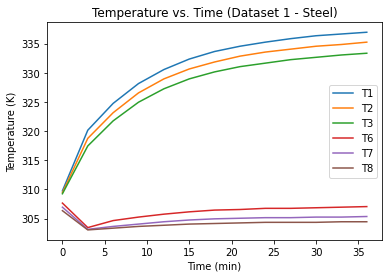

In [4]:
# Steel

V_s = 9.5 # V
I_s = 0.95 # A
t_s = 25 # mm

df_cond_s = pd.read_csv('data/conduction_steel.csv', index_col=0)
display(df_cond_s.head())
df_cond_s += + 273.15
df_cond_s.plot()
plt.title('Temperature vs. Time (Dataset 1 - Steel)')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)')


At dist = 37.5mm, T = 328.67499999999995K
At dist = 67.5mm, T = 311.29499999999996K


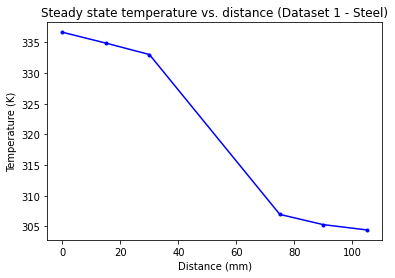

In [9]:
T_s = [336.65, 334.88, 333.02, 306.95, 305.28, 304.42]
d_s = [0, 15, 30, 75, 90, 105]

plt.plot(d_s, T_s, '.-b')
plt.xlabel('Distance (mm)')
plt.ylabel('Temperature (K)')
plt.title('Steady state temperature vs. distance (Dataset 1 - Steel)')

print(f'For Steel, at dist = 37.5mm, T = {np.interp(37.5, d_s, T_s)}K')
print(f'For Steel, at dist = 67.5mm, T = {np.interp(67.5, d_s, T_s)}K')


## Brass (Dataset 2)

,T1,T2,T3,T6,T7,T8
t,,,,,,
0,42.4,41.9,41.0,37.3,35.9,34.8
3,45.7,43.7,41.7,34.7,32.8,31.7
6,46.9,44.8,42.7,35.2,33.2,32.9
9,47.5,45.4,43.2,35.5,33.3,32.0
12,47.7,45.6,43.4,35.6,33.4,32.1


Text(0, 0.5, 'Temperature (K)')

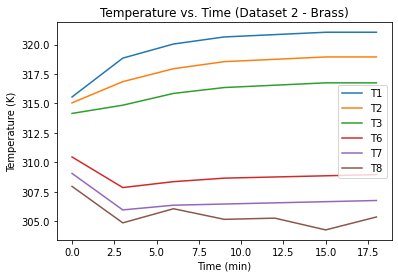

In [6]:
# Brass

V_b = 10 # V
I_b = 0.99 # A
t_b = 25 # mm

df_cond_r = pd.read_csv('data/conduction_brass.csv', index_col=0)
display(df_cond_r.head())

df_cond_r += 273.15
df_cond_r.plot()
plt.title('Temperature vs. Time (Dataset 2 - Brass)')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)')


For brass, at dist = 37.5mm, T = 315.3K
For brass, at dist = 67.5mm, T = 310.1K


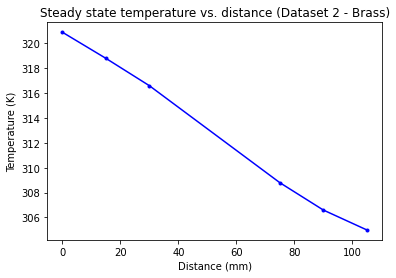

In [10]:
T_b = [320.9, 318.8, 316.6, 308.8, 306.6, 305]
d_b = [0, 15, 30, 75, 90, 105]

plt.plot(d_b, T_b, '.-b')
plt.xlabel('Distance (mm)')
plt.ylabel('Temperature (K)')
plt.title('Steady state temperature vs. distance (Dataset 2 - Brass)')

print(f'For Brass, at dist = 37.5mm, T = {np.interp(37.5, d_b, T_b)}K')
print(f'For Brass, at dist = 67.5mm, T = {np.interp(67.5, d_b, T_b)}K')
